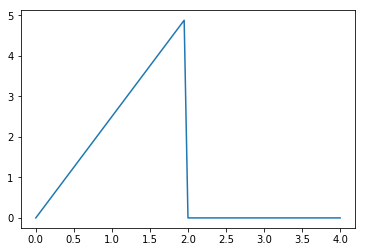

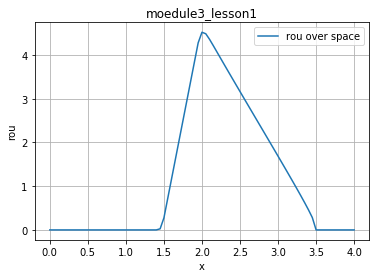

In [50]:
import numpy as np
import ipywidgets
from matplotlib import pyplot
%matplotlib inline

# Define Parameters
rou_L = 5.0
x_L = 2.0
rou_max = 10.0
v_max = 1.0
nx = 81
L = 4.0
dx = L / (nx - 1)
nt = 30
sigma = 1.0
dt = (sigma / v_max) * dx

# Define Function
Rou = lambda x: rou_L * x / x_L if (x < x_L) & (x >= 0.0) else 0

def Velocity(rou):
    global v_max, rou_max
    v = v_max * (1 - (rou / rou_max))
    return v

def Flux(rou):
    global v_max, rou_max
    F = rou * Velocity(rou)
    return F

def FTBS(rou_initial):
    global dt, dx, nt
    rou_total = []
    rou = rou_initial.copy()
    rou_total.append(rou.copy())
    for n in range(nt):
        rou[1:] = rou[1:] - (dt/dx) * (Flux(rou[1:]) - Flux(rou[:-1]))
        rou_total.append(rou.copy())
    return rou_total

# Calculate
x = np.linspace(0, L, nx)
rou_initial = np.zeros(nx)
for i in range(nx):
    rou_initial[i] = Rou(x[i])

rou_total = FTBS(rou_initial)

pyplot.figure(1)
pyplot.plot(x, rou_initial)

pyplot.figure(2)
pyplot.title('moedule3_lesson1')
pyplot.xlabel('x')
pyplot.ylabel('rou')
pyplot.plot(x, rou_total[-1], label = 'rou over space')
pyplot.grid()
pyplot.legend();

In [51]:
def plot(n, x, rho_hist):
    pyplot.figure()
    pyplot.title('Time step: ()'.format(n))
    pyplot.xlabel('Road')
    pyplot.ylabel('Traffic density')
    pyplot.plot(x, rho_hist[n])
    pyplot.xlim(x[0], x[-1])
    pyplot.ylim(-0.5, 11.0)
    pyplot.show()

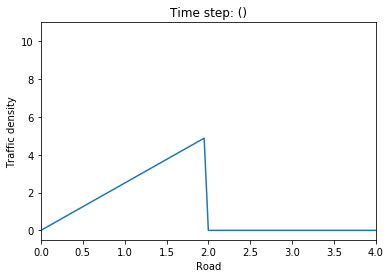

In [52]:
plot(0, x, rou_total)

In [53]:
def interactive_plot(x, rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='Time Step')
    w = ipywidgets.interactive(plot, n=nt_slider, x=ipywidgets.fixed(x), rho_hist=ipywidgets.fixed(rho_hist))
    return w
    

In [54]:
interactive_plot(x, rou_total)

interactive(children=(IntSlider(value=0, description='Time Step', max=30), Output()), _dom_classes=('widget-in…